
Loading Data + Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


main_df = pd.read_csv("/content/main_data.csv")
constructors_df = pd.read_csv("/content/constructors_data.csv")
drivers_df = pd.read_csv("/content/drivers_data.csv")

In [ ]:
main_df

,Unnamed: 0,resultId,raceId,driverId,constructorId,grid,positionOrder,milliseconds,year,round,circuitId
0,0,1,18,1,1,1,1,-0.006563,2008,1,1
1,1,2,18,2,2,5,2,0.016442,2008,1,1
2,2,3,18,3,3,7,3,0.027717,2008,1,1
3,3,4,18,4,4,11,4,0.065589,2008,1,1
4,4,5,18,5,1,3,5,0.069087,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7509,11205,26056,1109,848,3,16,11,1.259995,2023,11,11
7510,11212,26063,1109,858,3,20,18,1.260142,2023,11,11
7511,11231,26082,1110,858,3,18,17,-2.676146,2023,12,13
7512,11233,26084,1110,832,6,4,19,1.262443,2023,12,13


In [ ]:
constructors_df

,Unnamed: 0,constructorId,name
0,0,1,McLaren
1,1,2,BMW Sauber
2,2,3,Williams
3,3,4,Renault
4,4,5,Toro Rosso
5,5,6,Ferrari
6,6,7,Toyota
7,7,8,Super Aguri
8,8,9,Red Bull
9,9,10,Force India


In [ ]:
drivers_df

,Unnamed: 0,driverId,name
0,0,1,Lewis Hamilton
1,1,2,Nick Heidfeld
2,2,3,Nico Rosberg
3,3,4,Fernando Alonso
4,4,5,Heikki Kovalainen
...,...,...,...
148,852,854,Mick Schumacher
149,853,855,Guanyu Zhou
150,854,856,Nyck de Vries
151,855,857,Oscar Piastri


### Adding an extra feature: Top 3 Finish

The idea is to get an average of who were the top 3 finishes for drivers & constructors and use that feature to train our ML.

In [ ]:
main_df['Top 3 Finish'] = main_df['positionOrder'].le(3).astype(int)

print(main_df)

numRace = main_df["raceId"].nunique()
print(f"Number of unique drivers: {numRace}")

      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  
0                 1     -0.006563  2008      1          1             1  
1                 2    

In [ ]:
# Percentage of finishing in top 3 for last year

driver_stats = main_df.groupby(['year','driverId']).agg(Total_Races=('raceId','nunique'),Top_3_Finishes=('Top 3 Finish', 'sum')).reset_index()

print("Driver annual stats")
print(driver_stats)

# Calculate the % of top 3 finishes for each driver per year
driver_stats['Driver Top 3 Finish Percentage'] = (driver_stats['Top_3_Finishes']/driver_stats['Total_Races']) * 100

driver_last_year_stats = driver_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Top 3 Finish Percentage':'Driver Top 3 Finish Percentage (LAST YR)'})

Driver annual stats
     year  driverId  Total_Races  Top_3_Finishes
0    1995        14           15               6
1    1995        22           17               1
2    1995        30           13               7
3    1995        44           17               1
4    1995        49           16               0
..    ...       ...          ...             ...
567  2023       844            6               0
568  2023       846            6               2
569  2023       848            7               0
570  2023       857            7               0
571  2023       858            8               0

[572 rows x 4 columns]


In [ ]:
main_df = pd.merge(main_df, driver_last_year_stats[['year','driverId','Driver Top 3 Finish Percentage (LAST YR)']], on = ['year','driverId'], how = 'left')

print("New Main Data Frame")
print(main_df[main_df['year'] >= 1995])

New Main Data Frame
      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  \
0                 1     -0.006563  2008      1          1             1   
1

In [ ]:
# constructor percentage of finishing in top 3 for past year

constructor_stats = main_df.groupby(['year','constructorId','round']).agg(sum_top_3_finishes=('Driver Top 3 Finish Percentage (LAST YR)', 'sum')).reset_index()

print("Constructor Annual Stats")
print(constructor_stats)


Constructor Annual Stats
      year  constructorId  round  sum_top_3_finishes
0     1995              1      1                 0.0
1     1995              1      2                 0.0
2     1995              1      3                 0.0
3     1995              1      4                 0.0
4     1995              1      5                 0.0
...    ...            ...    ...                 ...
3898  2023              9      6                50.0
3899  2023              9      7               125.0
3900  2023              9      8               125.0
3901  2023              9     10               125.0
3902  2023              9     11               125.0

[3903 rows x 4 columns]


In [ ]:
# calculate the # of top 3 finishes for each constructor last yr
constructor_stats['Constructor Top 3 Finish Percentage (LAST YR)'] = constructor_stats['sum_top_3_finishes']/2

In [ ]:
# merge the new variable into the main dataframe

main_df = pd.merge(main_df, constructor_stats[['year','constructorId','round','Constructor Top 3 Finish Percentage (LAST YR)']], on = ['year','constructorId','round'], how = 'left')

#check
print("New Main Data Frame")
print(main_df[main_df['year']>=1995])

New Main Data Frame
      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  \
0                 1     -0.006563  2008      1          1             1   
1

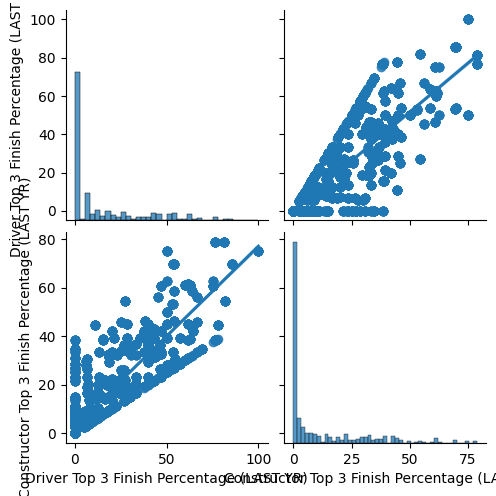

In [ ]:
# pairplot for driver top 3 finish & constructor top 3 finish
sns.pairplot(main_df[['Driver Top 3 Finish Percentage (LAST YR)', 'Constructor Top 3 Finish Percentage (LAST YR)']], kind="reg")

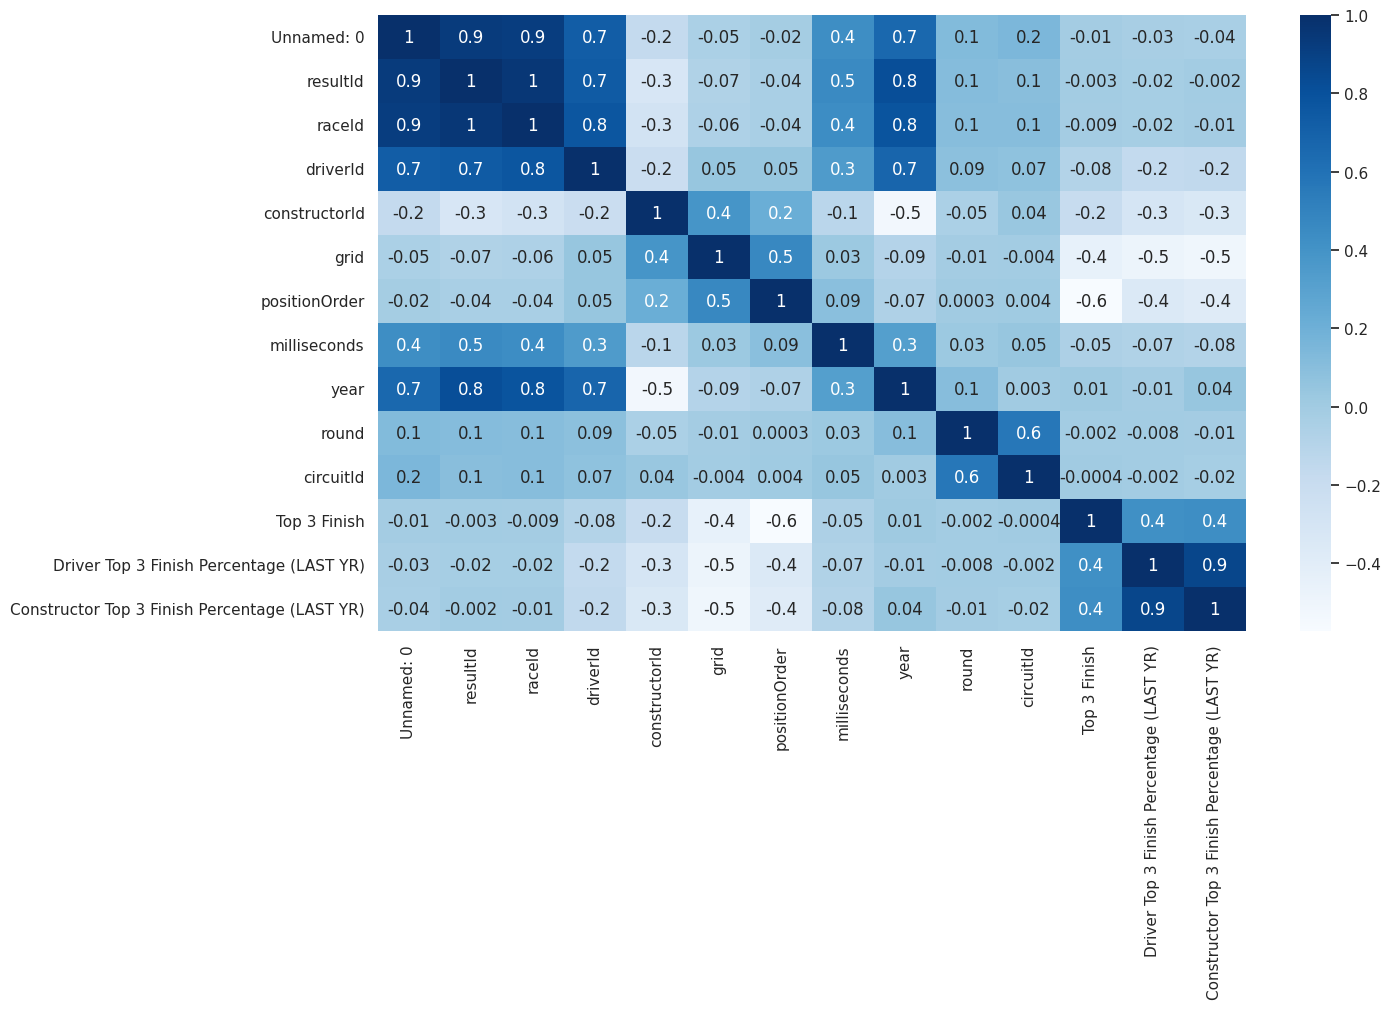

In [ ]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = main_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [ ]:
# percentage of drivers finishing in top 3 for current year until last race (2023 season)

def calculate_driver_top_3_percent(row, df):
  # filter for races in the same year, same driver, in earlier rounds
  prev_races = main_df[(main_df['year'] == row['year']) & (main_df['driverId'] == row['driverId']) &
                       (main_df['round'] < row['round'])]
  if len(prev_races) == 0:
    return pd.NA

  total_races = prev_races['raceId'].nunique()
  top_3_finishes = prev_races['Top 3 Finish'].sum()

  return (top_3_finishes/total_races) * 100 if total_races > 0 else pd.NA

In [ ]:
# Apply the function to each row
main_df['Driver Top 3 Finish Percentage (THIS YR)'] = main_df.apply(lambda row: calculate_driver_top_3_percent(row,main_df), axis=1)

In [ ]:
# calculating mean of top 3 finishes % for the drivers in each constructor this year
constructor_this_year = main_df.groupby(['year','constructorId','round']).agg(Sum_Top_3_Finishes=('Driver Top 3 Finish Percentage (THIS YR)', 'sum')).reset_index()

print("Constructor Annual Stats")
print(constructor_this_year)

Constructor Annual Stats
      year  constructorId  round Sum_Top_3_Finishes
0     1995              1      1                  0
1     1995              1      2                0.0
2     1995              1      3                0.0
3     1995              1      4                0.0
4     1995              1      5                0.0
...    ...            ...    ...                ...
3898  2023              9      6              100.0
3899  2023              9      7              150.0
3900  2023              9      8         133.333333
3901  2023              9     10              125.0
3902  2023              9     11              120.0

[3903 rows x 4 columns]


In [ ]:
# calculate % of top 3 finishes for constructor this yr
constructor_this_year['Constructor Top 3 Finish Percentage (THIS YR)'] = constructor_this_year['Sum_Top_3_Finishes']/2

In [ ]:
main_df = pd.merge(main_df, constructor_this_year[['year','constructorId','round','Constructor Top 3 Finish Percentage (THIS YR)']],
                   on = ['year','constructorId','round'], how = 'left')

print("New Main Data Frame")
print(main_df[main_df['year'] >= 1995])

New Main Data Frame
      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  \
0                 1     -0.006563  2008      1          1             1   
1

### Feature Engineering: Average Finishing Position

In [ ]:
# Calculating the total number of races and top 3 finishes for each driver in each year
driver_yearly_stats = main_df.groupby(['year','driverId']).agg(
    Total_Races=('raceId','nunique'),
    Avg_Position=('positionOrder','mean')
).reset_index()

print("Diver Annual Stats")
print(driver_yearly_stats)

Diver Annual Stats
     year  driverId  Total_Races  Avg_Position
0    1995        14           15     11.466667
1    1995        22           17     12.117647
2    1995        30           13      7.307692
3    1995        44           17     10.764706
4    1995        49           16      9.812500
..    ...       ...          ...           ...
567  2023       844            6     11.666667
568  2023       846            6     10.000000
569  2023       848            7     12.142857
570  2023       857            7     11.857143
571  2023       858            8     16.500000

[572 rows x 4 columns]


In [ ]:
driver_yearly_stats['Driver Avg Position (THIS YR)'] = driver_yearly_stats['Avg_Position']

# Shifting the driver percentages to the next year for last year's data
driver_last_year_stats = driver_yearly_stats.copy()
driver_last_year_stats['year'] += 1
driver_last_year_stats = driver_last_year_stats.rename(columns={'Driver Avg Position (THIS YR)' :
                                                                'Driver Avg Position (LAST YR)'})

main_df = pd.merge(main_df, driver_last_year_stats[['year','driverId','Driver Avg Position (LAST YR)']],
                   on = ['year', 'driverId'], how = 'left')

print("New Main DataFrame")
print(main_df[main_df['year'] >= 1995])

New Main DataFrame
      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  \
0                 1     -0.006563  2008      1          1             1   
1 

In [ ]:
# Constructor mean of top 3 finishes percentage of drivers last yr
constructor_yearly_stats = main_df.groupby(['year','constructorId','round']).agg(
    sum_position_last_year=('Driver Avg Position (LAST YR)','sum')
).reset_index()

print("Constructor Annual Stats")
print(constructor_yearly_stats)

Constructor Annual Stats
      year  constructorId  round  sum_position_last_year
0     1995              1      1                0.000000
1     1995              1      2                0.000000
2     1995              1      3                0.000000
3     1995              1      4                0.000000
4     1995              1      5                0.000000
...    ...            ...    ...                     ...
3898  2023              9      6                6.083333
3899  2023              9      7               10.416667
3900  2023              9      8               10.416667
3901  2023              9     10               10.416667
3902  2023              9     11               10.416667

[3903 rows x 4 columns]


In [ ]:
# Claculating the % of top 3 finishes for each constructor
constructor_yearly_stats['Constructor Avg Position (LAST YR)'] = constructor_yearly_stats['sum_position_last_year']/2

main_df = pd.merge(main_df, constructor_yearly_stats[['year','constructorId','round','Constructor Avg Position (LAST YR)']],
                   on = ['year','constructorId','round'], how = 'left')

print("New Main DataFrame")
print(main_df[main_df['year'] >= 1995])

New Main DataFrame
      Unnamed: 0  resultId  raceId  driverId  constructorId  grid  \
0              0         1      18         1              1     1   
1              1         2      18         2              2     5   
2              2         3      18         3              3     7   
3              3         4      18         4              4    11   
4              4         5      18         5              1     3   
...          ...       ...     ...       ...            ...   ...   
7509       11205     26056    1109       848              3    16   
7510       11212     26063    1109       858              3    20   
7511       11231     26082    1110       858              3    18   
7512       11233     26084    1110       832              6     4   
7513       11234     26085    1110       857              1     5   

      positionOrder  milliseconds  year  round  circuitId  Top 3 Finish  \
0                 1     -0.006563  2008      1          1             1   
1 

### Checking our Dataframe


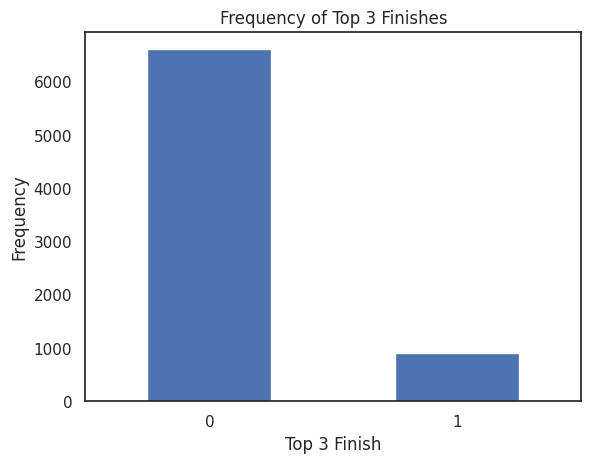

In [ ]:


main_df['Top 3 Finish'].value_counts().plot(kind='bar')
plt.title('Frequency of Top 3 Finishes')
plt.xlabel('Top 3 Finish')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
nan_counts = main_df.isna().sum()
print(nan_counts)

Unnamed: 0                                          0
resultId                                            0
raceId                                              0
driverId                                            0
constructorId                                       0
grid                                                0
positionOrder                                       0
milliseconds                                        0
year                                                0
round                                               0
circuitId                                           0
Top 3 Finish                                        0
Driver Top 3 Finish Percentage (LAST YR)         1887
Constructor Top 3 Finish Percentage (LAST YR)       0
Driver Top 3 Finish Percentage (THIS YR)          572
Constructor Top 3 Finish Percentage (THIS YR)       0
Driver Avg Position (LAST YR)                    1887
Constructor Avg Position (LAST YR)                  0
dtype: int64


We're looking at the extra features we added to our dataframe. Going to add more stuff here

### Feature Selection

In [ ]:
main_df = main_df.drop(labels=['raceId'], axis=1)

In [ ]:
print("Number of rows in total:", main_df.shape[0])
main_df = main_df.dropna()

print(main_df)

Number of rows in total: 7514
      Unnamed: 0  resultId  driverId  constructorId  grid  positionOrder  \
22            22        23         8              6     2              1   
23            23        24         9              2     4              2   
24            24        25         5              1     8              3   
25            25        26        15              7     3              4   
26            26        27         1              1     9              5   
...          ...       ...       ...            ...   ...            ...   
7505       11197     26048       815              9     9              3   
7507       11201     26052       844              6     6              7   
7508       11202     26053       832              6    11              8   
7509       11205     26056       848              3    16             11   
7512       11233     26084       832              6     4             19   

      milliseconds  year  round  circuitId  Top 3 Finish 

### One Hot Encoding

In [ ]:
main_df_encoded = pd.get_dummies(main_df, columns = ['circuitId','driverId','constructorId'])

In [ ]:
cols = [col for col in main_df_encoded.columns if col != 'Top 3 Finish']

main_df_encoded = main_df_encoded[cols + ['Top 3 Finish']]

print(main_df_encoded)
print(main_df_encoded.shape)

      Unnamed: 0  resultId  grid  positionOrder  milliseconds  year  round  \
22            22        23     2              1     -0.897114  2008      2   
23            23        24     4              2     -0.814930  2008      2   
24            24        25     8              3     -0.735643  2008      2   
25            25        26     3              4     -0.704642  2008      2   
26            26        27     9              5     -0.701636  2008      2   
...          ...       ...   ...            ...           ...   ...    ...   
7505       11197     26048     9              3      0.982928  2023     11   
7507       11201     26052     6              7      1.120311  2023     11   
7508       11202     26053    11              8      1.123486  2023     11   
7509       11205     26056    16             11      1.259995  2023     11   
7512       11233     26084     4             19      1.262443  2023     12   

      Driver Top 3 Finish Percentage (LAST YR)  \
22           

# THE FUN PART (no not really): Logistic Regression

### Predicting F1 Podiums WITHOUT the qualifying data

**Training Data:** 1995 - 2008 \\
**Validation Data:** 2009 - 2015 \\
**Test Data:** 2016 - 2023

In [ ]:
for col in main_df_encoded:
  print(col)

Unnamed: 0
resultId
grid
positionOrder
milliseconds
year
round
Driver Top 3 Finish Percentage (LAST YR)
Constructor Top 3 Finish Percentage (LAST YR)
Driver Top 3 Finish Percentage (THIS YR)
Constructor Top 3 Finish Percentage (THIS YR)
Driver Avg Position (LAST YR)
Constructor Avg Position (LAST YR)
circuitId_1
circuitId_2
circuitId_3
circuitId_4
circuitId_5
circuitId_6
circuitId_7
circuitId_8
circuitId_9
circuitId_10
circuitId_11
circuitId_12
circuitId_13
circuitId_14
circuitId_15
circuitId_16
circuitId_17
circuitId_18
circuitId_19
circuitId_20
circuitId_21
circuitId_22
circuitId_24
circuitId_25
circuitId_26
circuitId_27
circuitId_32
circuitId_34
circuitId_35
circuitId_39
driverId_1
driverId_2
driverId_3
driverId_4
driverId_5
driverId_6
driverId_7
driverId_8
driverId_9
driverId_10
driverId_11
driverId_12
driverId_13
driverId_14
driverId_15
driverId_16
driverId_17
driverId_18
driverId_19
driverId_20
driverId_21
driverId_22
driverId_23
driverId_24
driverId_25
driverId_26
driverId_27
dr

In [ ]:
lg_df = main_df_encoded.drop(['grid','Driver Top 3 Finish Percentage (THIS YR)', 'Constructor Top 3 Finish Percentage (THIS YR)', 'Constructor Top 3 Finish Percentage (LAST YR)',
                              'Driver Avg Position (LAST YR)', 'Unnamed: 0', 'resultId', 'positionOrder','milliseconds'], axis = 1)

# 'Driver Top 3 Finish Percentage (LAST YR)'
# 'Constructor Avg Position (LAST YR)'


https://www.youtube.com/watch?v=bSXIbCZNBw0 - Logistic Regression

In [ ]:
lg_df.head()

,year,round,Driver Top 3 Finish Percentage (LAST YR),Constructor Avg Position (LAST YR),circuitId_1,circuitId_2,circuitId_3,circuitId_4,circuitId_5,circuitId_6,...,constructorId_20,constructorId_21,constructorId_22,constructorId_23,constructorId_24,constructorId_25,constructorId_27,constructorId_28,constructorId_29,Top 3 Finish
22,2008,2,61.538462,5.615385,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
23,2008,2,0.000000,8.538462,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
24,2008,2,0.000000,6.692308,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
25,2008,2,0.000000,6.266667,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
26,2008,2,69.230769,6.692308,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# setting up our train, validation, test dataframes

train_df = lg_df[(lg_df['year'] >= 1995) & (lg_df['year'] <= 2010)]
val_df = lg_df[(lg_df['year'] >= 2011) & (lg_df['year'] <= 2015)]
test_df = lg_df[(lg_df['year'] >= 2016) & (lg_df['year'] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

In [ ]:
# Import necessary libraries
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid
import math
!pip install tensorflow
!pip install -q -U keras-tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# IGNORE
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=FutureWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
model_acc = {}
# Define the hyperparameter grid
param_grid = {
    'LogisticRegression': {'C' : [.001, .01, .1, 1, 10, 100], 'random_state' : [42]},
    'RandomForestClassifier': {'n_estimators' : [10, 50, 100], 'max_depth' : [None, 10, 20, 30], 'random_state': [42]}
}

# Initialize Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

def hyperparameter_tuner(model, params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    model.set_params(**param)
    model.fit(X_train, y_train)
    probability = model.predict_proba(X_val)

    auc = roc_auc_score(y_val, probability[:,1])
    if auc > best_auc:
      best_auc = auc
      best_model = model
      best_params = param
  return best_model, best_params




Separate Training for ANN

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.int32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

In [ ]:

model_acc = {}

# Define the hyperparameter grid
#test for range of number of hidden layer neurons between half of input to input length

starting_hidden_neurons = math.floor(len(X_train[0,:])/2)
ending_hidden_neurons = len(X_train[0,:])
nn_param_grid = {
  'num_hidden_neurons' :np.arange( starting_hidden_neurons, ending_hidden_neurons +1, 20),
  'num_epochs': np.arange(10, 101, 10)
}


def nn_hyperparameter_tuner(  params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    #create nn model with params
    nn_model = Sequential()
    nn_model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
    nn_model.add(Dense(param['num_hidden_neurons'], activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
    #compile
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #run with param epochs
    nn_model.fit(X_train, y_train, epochs=param['num_epochs'], verbose=1, validation_data= (X_test, y_test))

    probability =[ val[0] for val in nn_model.predict(X_val) ]
    auc = roc_auc_score(y_val, probability)
    if auc > best_auc:
      best_auc = auc
      best_model = nn_model
      best_params = param
  return best_model, best_params

# --------------------------------------------------------- #

print(f"Model: ANN")
best_model, best_params = nn_hyperparameter_tuner(nn_param_grid, X_train, y_train, X_val, y_val)
print(f'Best parameters for ANN: {best_params}')
model = best_model




Model: ANN
Epoch 1/10
111/111 [==============================] - 2s 8ms/step - loss: 4.2717 - accuracy: 0.8038 - val_loss: 0.5028 - val_accuracy: 0.8708
Epoch 2/10
111/111 [==============================] - 1s 9ms/step - loss: 0.9913 - accuracy: 0.8323 - val_loss: 1.0681 - val_accuracy: 0.7622
Epoch 3/10
111/111 [==============================] - 1s 8ms/step - loss: 0.9906 - accuracy: 0.8222 - val_loss: 0.6685 - val_accuracy: 0.8740
Epoch 4/10
111/111 [==============================] - 1s 5ms/step - loss: 1.3500 - accuracy: 0.8239 - val_loss: 3.6032 - val_accuracy: 0.8599
Epoch 5/10
111/111 [==============================] - 1s 5ms/step - loss: 1.7255 - accuracy: 0.8292 - val_loss: 2.0757 - val_accuracy: 0.8599
Epoch 6/10
111/111 [==============================] - 1s 6ms/step - loss: 0.7829 - accuracy: 0.8295 - val_loss: 1.0213 - val_accuracy: 0.7470
Epoch 7/10
111/111 [==============================] - 0s 3ms/step - loss: 0.9349 - accuracy: 0.8230 - val_loss: 1.2286 - val_accuracy: 0.

KeyboardInterrupt: 

The best params were : {'num_epochs': 20, 'num_hidden_neurons': 98}

Epoch 1/20
111/111 [==============================] - 6s 18ms/step - loss: 2.7764 - accuracy: 0.7883 - val_loss: 2.1608 - val_accuracy: 0.8599
Epoch 2/20
111/111 [==============================] - 1s 13ms/step - loss: 0.8792 - accuracy: 0.8126 - val_loss: 1.6460 - val_accuracy: 0.8599
Epoch 3/20
111/111 [==============================] - 1s 9ms/step - loss: 0.8905 - accuracy: 0.8047 - val_loss: 0.4158 - val_accuracy: 0.8241
Epoch 4/20
111/111 [==============================] - 1s 9ms/step - loss: 0.8975 - accuracy: 0.8106 - val_loss: 0.4024 - val_accuracy: 0.8241
Epoch 5/20
111/111 [==============================] - 2s 15ms/step - loss: 0.8051 - accuracy: 0.8143 - val_loss: 1.7638 - val_accuracy: 0.1477
Epoch 6/20
111/111 [==============================] - 2s 16ms/step - loss: 1.5347 - accuracy: 0.7855 - val_loss: 2.9826 - val_accuracy: 0.8599
Epoch 7/20
111/111 [==============================] - 2s 14ms/step - loss: 1.0113 - accuracy: 0.8106 - val_loss: 0.3392 - val_accuracy: 0.8751
E

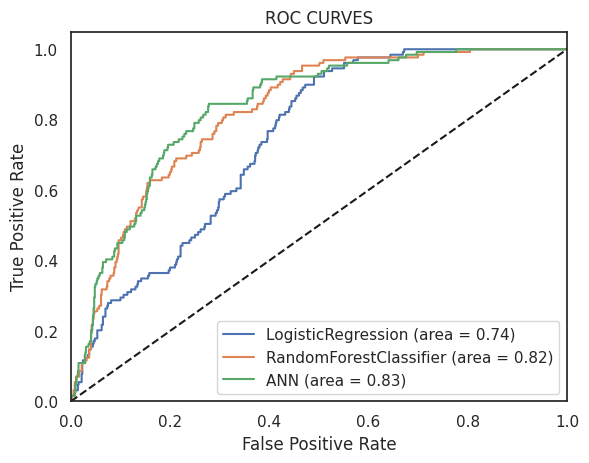

In [ ]:
#For recreating modal without going through hypertuning again
best_params = {'num_epochs': 20, 'num_hidden_neurons': 98}
model = Sequential()
model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
model.add(Dense(best_params['num_hidden_neurons'], activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#run with param epochs
model.fit(X_train, y_train, epochs=best_params['num_epochs'], verbose=1, validation_data= (X_test, y_test))
models['ANN'] = model



for name, model in models.items():
  print(f"Model: {name}")
  if name in param_grid and name != 'ANN':
    best_model, best_params = hyperparameter_tuner(model, param_grid[name], X_train, y_train, X_val, y_val)
    print(f'Best parameters for {name}: {best_params}')
    model = best_model

  # predict & eval test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    acc_test = accuracy_score(y_test, pred_test[:,1] >= 0.5)

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V1.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)
  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
  if name == 'ANN':
    # predict & eval test data using AUC-ROC
    pred_test =[val[0] for val in model.predict(X_test)]
    pred_test = np.asarray(pred_test)
    auc_test = roc_auc_score(y_test, pred_test)
    acc_test = accuracy_score(y_test, pred_test >= 0.5)

    name = 'ANN'

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V1.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)



  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
for model_name, info in model_acc.items():
  print(f'Model: {model_name}, File: {info["model"]}, Test AUC-ROC: {info["auc_roc"]:.4f}, Test Accuracy: {info["accuracy"]:.4f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc='lower right')
plt.show()

In [ ]:
loss, accuracy = models['ANN'].evaluate(X_test, y_test)


29/29 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8599


### Model 2: Add all the extra features

In [ ]:
lg_df_2 = main_df_encoded.drop(['grid', 'Unnamed: 0', 'resultId', 'positionOrder', 'milliseconds'], axis = 1)

In [ ]:
lg_df_2.head()

,year,round,Driver Top 3 Finish Percentage (LAST YR),Constructor Top 3 Finish Percentage (LAST YR),Driver Top 3 Finish Percentage (THIS YR),Constructor Top 3 Finish Percentage (THIS YR),Driver Avg Position (LAST YR),Constructor Avg Position (LAST YR),circuitId_1,circuitId_2,...,constructorId_20,constructorId_21,constructorId_22,constructorId_23,constructorId_24,constructorId_25,constructorId_27,constructorId_28,constructorId_29,Top 3 Finish
22,2008,2,61.538462,61.538462,0.0,0.0,4.923077,5.615385,False,True,...,False,False,False,False,False,False,False,False,False,1
23,2008,2,0.000000,7.692308,0.0,50.0,10.000000,8.538462,False,True,...,False,False,False,False,False,False,False,False,False,1
24,2008,2,0.000000,34.615385,0.0,50.0,9.000000,6.692308,False,True,...,False,False,False,False,False,False,False,False,False,1
25,2008,2,0.000000,0.000000,0.0,0.0,12.533333,6.266667,False,True,...,False,False,False,False,False,False,False,False,False,0
26,2008,2,69.230769,34.615385,100.0,50.0,4.384615,6.692308,False,True,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# setting up our train, validation, test dataframes

train_df = lg_df_2[(lg_df_2['year'] >= 1995) & (lg_df_2['year'] <= 2010)]
val_df = lg_df_2[(lg_df_2['year'] >= 2011) & (lg_df_2['year'] <= 2015)]
test_df = lg_df_2[(lg_df_2['year'] >= 2016) & (lg_df_2['year'] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

In [ ]:
model_acc = {}
# Define the hyperparameter grid
param_grid = {
    'LogisticRegression': {'C' : [.001, .01, .1, 1, 10, 100], 'random_state' : [42]},
    'RandomForestClassifier': {'n_estimators' : [10, 50, 100], 'max_depth' : [None, 10, 20, 30], 'random_state': [42]}
}

# Initialize Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

def hyperparameter_tuner(model, params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    model.set_params(**param)
    model.fit(X_train, y_train)
    probability = model.predict_proba(X_val)
    auc = roc_auc_score(y_val, probability[:,1])
    if auc > best_auc:
      best_auc = auc
      best_model = model
      best_params = param
  return best_model, best_params




Separate training for ANN

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.int32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

In [ ]:

model_acc = {}

# Define the hyperparameter grid
#test for range of number of hidden layer neurons between half of input to input length

starting_hidden_neurons = math.floor(len(X_train[0,:])/2)
ending_hidden_neurons = len(X_train[0,:])
nn_param_grid = {
  'num_hidden_neurons' :np.arange( starting_hidden_neurons, ending_hidden_neurons +1, 20),
  'num_epochs': np.arange(10, 101, 10)
}


def nn_hyperparameter_tuner(  params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    #create nn model with params
    nn_model = Sequential()
    nn_model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
    nn_model.add(Dense(param['num_hidden_neurons'], activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
    #compile
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #run with param epochs
    nn_model.fit(X_train, y_train, epochs=param['num_epochs'], verbose=1, validation_data= (X_test, y_test))

    probability =[ val[0] for val in nn_model.predict(X_val) ]
    auc = roc_auc_score(y_val, probability)
    if auc > best_auc:
      best_auc = auc
      best_model = nn_model
      best_params = param
  return best_model, best_params

# --------------------------------------------------------- #

print(f"Model: ANN")
best_model, best_params = nn_hyperparameter_tuner(nn_param_grid, X_train, y_train, X_val, y_val)
print(f'Best parameters for ANN: {best_params}')
model = best_model


Model: ANN
Epoch 1/10
111/111 [==============================] - 1s 4ms/step - loss: 4.3351 - accuracy: 0.8188 - val_loss: 0.3990 - val_accuracy: 0.8751
Epoch 2/10
111/111 [==============================] - 0s 3ms/step - loss: 1.2630 - accuracy: 0.8171 - val_loss: 0.4760 - val_accuracy: 0.8426
Epoch 3/10
111/111 [==============================] - 0s 3ms/step - loss: 0.7418 - accuracy: 0.8332 - val_loss: 0.6432 - val_accuracy: 0.8686
Epoch 4/10
111/111 [==============================] - 0s 3ms/step - loss: 1.4568 - accuracy: 0.8100 - val_loss: 0.9811 - val_accuracy: 0.8230
Epoch 5/10
 97/111 [=========================>....] - ETA: 0s - loss: 0.8128 - accuracy: 0.8322

KeyboardInterrupt: 

The best params were Best parameters for ANN: {'num_epochs': 80, 'num_hidden_neurons': 160}


Epoch 1/80
111/111 [==============================] - 2s 9ms/step - loss: 6.5667 - accuracy: 0.8151 - val_loss: 1.2874 - val_accuracy: 0.7405
Epoch 2/80
111/111 [==============================] - 0s 3ms/step - loss: 0.7450 - accuracy: 0.8278 - val_loss: 0.4785 - val_accuracy: 0.8643
Epoch 3/80
111/111 [==============================] - 0s 3ms/step - loss: 1.6401 - accuracy: 0.8171 - val_loss: 1.5605 - val_accuracy: 0.7220
Epoch 4/80
111/111 [==============================] - 0s 3ms/step - loss: 1.1151 - accuracy: 0.8134 - val_loss: 2.3302 - val_accuracy: 0.8599
Epoch 5/80
111/111 [==============================] - 0s 3ms/step - loss: 0.9673 - accuracy: 0.8363 - val_loss: 1.3525 - val_accuracy: 0.8599
Epoch 6/80
111/111 [==============================] - 0s 3ms/step - loss: 1.2590 - accuracy: 0.8146 - val_loss: 1.0899 - val_accuracy: 0.8654
Epoch 7/80
111/111 [==============================] - 0s 3ms/step - loss: 0.8026 - accuracy: 0.8360 - val_loss: 0.6535 - val_accuracy: 0.8610
Epoch 

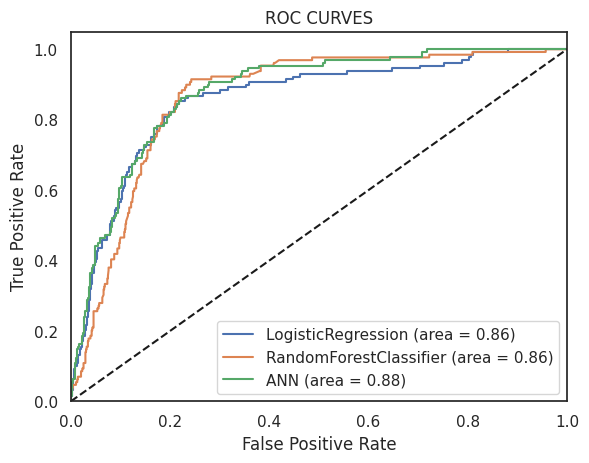

In [ ]:
#For recreating modal without going through hypertuning again
best_params = {'num_epochs': 80, 'num_hidden_neurons': 160}
model = Sequential()
model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
model.add(Dense(best_params['num_hidden_neurons'], activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#run with param epochs
model.fit(X_train, y_train, epochs=best_params['num_epochs'], verbose=1, validation_data= (X_test, y_test))
models['ANN'] = model
print(models)



for name, model in models.items():
  print(f"Model: {name}")
  if name in param_grid and name != 'ANN':
    best_model, best_params = hyperparameter_tuner(model, param_grid[name], X_train, y_train, X_val, y_val)
    print(f'Best parameters for {name}: {best_params}')
    model = best_model

  # predict & eval test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    acc_test = accuracy_score(y_test, pred_test[:,1] >= 0.5)

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V2.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)
  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
  if name == 'ANN':
    # predict & eval test data using AUC-ROC
    pred_test =[val[0] for val in model.predict(X_test)]
    pred_test = np.asarray(pred_test)
    auc_test = roc_auc_score(y_test, pred_test)
    acc_test = accuracy_score(y_test, pred_test >= 0.5)

    name = 'ANN'

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V2.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)



  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
for model_name, info in model_acc.items():
  print(f'Model: {model_name}, File: {info["model"]}, Test AUC-ROC: {info["auc_roc"]:.4f}, Test Accuracy: {info["accuracy"]:.4f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc='lower right')
plt.show()

In [ ]:
loss, accuracy = models['ANN'].evaluate(X_test, y_test)


29/29 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8654


Model 3: Add the starting grid position

In [ ]:
lg_df_3 = main_df_encoded.drop(['Unnamed: 0', 'resultId', 'positionOrder', 'milliseconds'], axis = 1)

In [ ]:
lg_df_3.head()

,grid,year,round,Driver Top 3 Finish Percentage (LAST YR),Constructor Top 3 Finish Percentage (LAST YR),Driver Top 3 Finish Percentage (THIS YR),Constructor Top 3 Finish Percentage (THIS YR),Driver Avg Position (LAST YR),Constructor Avg Position (LAST YR),circuitId_1,...,constructorId_20,constructorId_21,constructorId_22,constructorId_23,constructorId_24,constructorId_25,constructorId_27,constructorId_28,constructorId_29,Top 3 Finish
22,2,2008,2,61.538462,61.538462,0.0,0.0,4.923077,5.615385,False,...,False,False,False,False,False,False,False,False,False,1
23,4,2008,2,0.000000,7.692308,0.0,50.0,10.000000,8.538462,False,...,False,False,False,False,False,False,False,False,False,1
24,8,2008,2,0.000000,34.615385,0.0,50.0,9.000000,6.692308,False,...,False,False,False,False,False,False,False,False,False,1
25,3,2008,2,0.000000,0.000000,0.0,0.0,12.533333,6.266667,False,...,False,False,False,False,False,False,False,False,False,0
26,9,2008,2,69.230769,34.615385,100.0,50.0,4.384615,6.692308,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# setting up our train, validation, test dataframes
from joblib import load
train_df = lg_df_3[(lg_df_3['year'] >= 1995) & (lg_df_3['year'] <= 2010)]
val_df = lg_df_3[(lg_df_3['year'] >= 2011) & (lg_df_3['year'] <= 2015)]
test_df = lg_df_3[(lg_df_3['year'] >= 2016) & (lg_df_3['year'] <= 2023)]

X_train = train_df[train_df.columns.tolist()[:-1]].values
y_train = train_df['Top 3 Finish'].values
X_val = val_df[train_df.columns.tolist()[:-1]].values
y_val = val_df['Top 3 Finish'].values
X_test = test_df[train_df.columns.tolist()[:-1]].values
y_test = test_df['Top 3 Finish'].values

In [ ]:
model_acc = {}
# Define the hyperparameter grid
param_grid = {
    'LogisticRegression': {'C' : [.001, .01, .1, 1, 10, 100], 'random_state' : [42]},
    'RandomForestClassifier': {'n_estimators' : [10, 50, 100], 'max_depth' : [None, 10, 20, 30], 'random_state': [42]}
}

# Initialize Models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier()
}

def hyperparameter_tuner(model, params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    model.set_params(**param)
    model.fit(X_train, y_train)
    probability = model.predict_proba(X_val)
    auc = roc_auc_score(y_val, probability[:,1])
    if auc > best_auc:
      best_auc = auc
      best_model = model
      best_params = param
  return best_model, best_params






Separate Training for ANN

In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.int32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

In [ ]:
model_acc = {}

# Define the hyperparameter grid
#test for range of number of hidden layer neurons between half of input to input length

starting_hidden_neurons = math.floor(len(X_train[0,:])/2)
ending_hidden_neurons = len(X_train[0,:])
nn_param_grid = {
  'num_hidden_neurons' :np.arange( starting_hidden_neurons, ending_hidden_neurons +1, 20),
  'num_epochs': np.arange(10, 101, 10)
}


def nn_hyperparameter_tuner(  params, X_train, y_train, X_val, y_val):
  best_model = None
  best_params = {}
  best_auc = 0

  for param in ParameterGrid(params):
    #create nn model with params
    nn_model = Sequential()
    nn_model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
    nn_model.add(Dense(param['num_hidden_neurons'], activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
    #compile
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #run with param epochs
    nn_model.fit(X_train, y_train, epochs=param['num_epochs'], verbose=1, validation_data= (X_test, y_test))

    probability =[ val[0] for val in nn_model.predict(X_val) ]
    auc = roc_auc_score(y_val, probability)
    if auc > best_auc:
      best_auc = auc
      best_model = nn_model
      best_params = param
  return best_model, best_params

# --------------------------------------------------------- #

print(f"Model: ANN")
best_model, best_params = nn_hyperparameter_tuner(nn_param_grid, X_train, y_train, X_val, y_val)
print(f'Best parameters for ANN: {best_params}')
model = best_model


Streaming output truncated to the last 5000 lines.
Epoch 30/30
24/24 [==============================] - 0s 2ms/step
Epoch 1/30
111/111 [==============================] - 2s 6ms/step - loss: 2.8388 - accuracy: 0.8024 - val_loss: 0.7973 - val_accuracy: 0.8415
Epoch 2/30
111/111 [==============================] - 0s 4ms/step - loss: 0.9832 - accuracy: 0.8326 - val_loss: 0.6576 - val_accuracy: 0.8122
Epoch 3/30
111/111 [==============================] - 0s 4ms/step - loss: 1.1926 - accuracy: 0.8239 - val_loss: 1.0360 - val_accuracy: 0.8654
Epoch 4/30
111/111 [==============================] - 1s 5ms/step - loss: 0.9494 - accuracy: 0.8295 - val_loss: 0.5437 - val_accuracy: 0.8284
Epoch 5/30
111/111 [==============================] - 0s 4ms/step - loss: 1.2359 - accuracy: 0.8321 - val_loss: 1.1788 - val_accuracy: 0.8599
Epoch 6/30
111/111 [==============================] - 0s 4ms/step - loss: 1.4649 - accuracy: 0.8185 - val_loss: 0.6156 - val_accuracy: 0.8610
Epoch 7/30
111/111 [============

Best parameters for ANN: {'num_epochs': 80, 'num_hidden_neurons': 141}


Epoch 1/80
111/111 [==============================] - 2s 8ms/step - loss: 5.2819 - accuracy: 0.8089 - val_loss: 0.6276 - val_accuracy: 0.8708
Epoch 2/80
111/111 [==============================] - 0s 4ms/step - loss: 1.7966 - accuracy: 0.8160 - val_loss: 2.0633 - val_accuracy: 0.8599
Epoch 3/80
111/111 [==============================] - 1s 5ms/step - loss: 1.4833 - accuracy: 0.8213 - val_loss: 1.9430 - val_accuracy: 0.8632
Epoch 4/80
111/111 [==============================] - 1s 6ms/step - loss: 1.4816 - accuracy: 0.8400 - val_loss: 0.5236 - val_accuracy: 0.8664
Epoch 5/80
111/111 [==============================] - 1s 6ms/step - loss: 1.1666 - accuracy: 0.8343 - val_loss: 0.6549 - val_accuracy: 0.8621
Epoch 6/80
111/111 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.8357 - val_loss: 0.3969 - val_accuracy: 0.8436
Epoch 7/80
111/111 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.8360 - val_loss: 0.2988 - val_accuracy: 0.8708
Epoch 

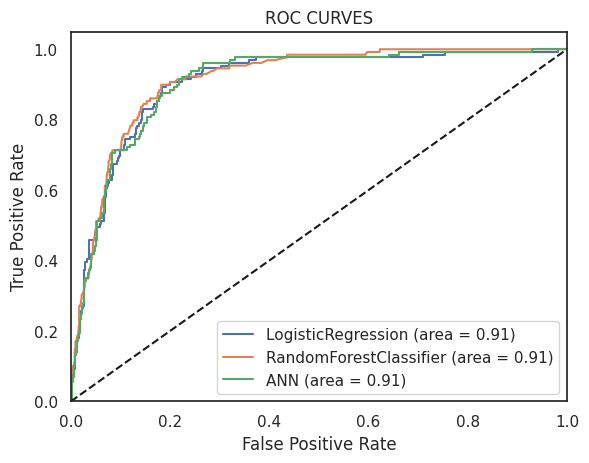

In [ ]:
#For recreating modal without going through hypertuning again
best_params =  {'num_epochs': 80, 'num_hidden_neurons': 141}
model = Sequential()
model.add(Dense(len(X_train[0,:]), input_dim=len(X_train[0,:]), activation='relu'))
model.add(Dense(best_params['num_hidden_neurons'], activation='relu'))
model.add(Dense(1, activation='sigmoid')) # binary classification calls for sigmpid activation function
#compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#run with param epochs
model.fit(X_train, y_train, epochs=best_params['num_epochs'], verbose=1, validation_data= (X_test, y_test))
models['ANN'] = model
print(models)



for name, model in models.items():
  print(f"Model: {name}")
  if name in param_grid and name != 'ANN':
    best_model, best_params = hyperparameter_tuner(model, param_grid[name], X_train, y_train, X_val, y_val)
    print(f'Best parameters for {name}: {best_params}')
    model = best_model

  # predict & eval test data using AUC-ROC
    pred_test = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, pred_test[:, 1])
    acc_test = accuracy_score(y_test, pred_test[:,1] >= 0.5)

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V3.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test[:, 1])
    roc_auc = auc(fpr, tpr)
  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
  if name == 'ANN':
    # predict & eval test data using AUC-ROC
    pred_test =[val[0] for val in model.predict(X_test)]
    pred_test = np.asarray(pred_test)
    auc_test = roc_auc_score(y_test, pred_test)
    acc_test = accuracy_score(y_test, pred_test >= 0.5)

    name = 'ANN'

    print(f'Test AUC-ROC for {name}: {auc_test:.4f}\n')
    model_f = f'{name}_model_V3.joblib'
    joblib.dump(model, model_f)
    model_acc[name] = {
        'model' : model_f,
        'auc_roc' : auc_test,
        'accuracy' : acc_test
    }

    fpr, tpr, thresholds = roc_curve(y_test, pred_test)
    roc_auc = auc(fpr, tpr)



  # PLOTTTT
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
for model_name, info in model_acc.items():
  print(f'Model: {model_name}, File: {info["model"]}, Test AUC-ROC: {info["auc_roc"]:.4f}, Test Accuracy: {info["accuracy"]:.4f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES')
plt.legend(loc='lower right')
plt.show()

In [ ]:
loss, accuracy = models['ANN'].evaluate(X_test, y_test)


29/29 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8436


Optimal Threshold for F1 Score: 0.325


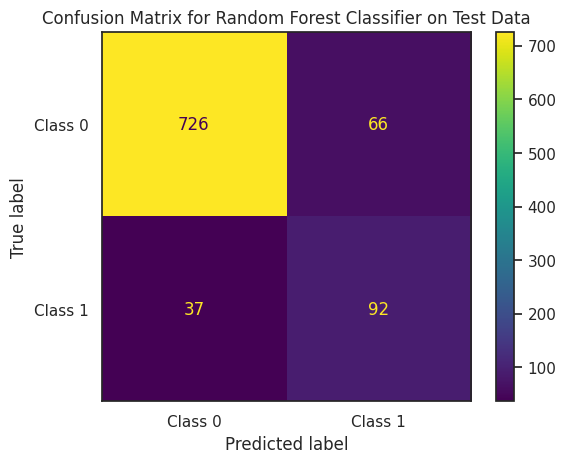

Accuracy of the model: 0.888
F1 Score of the model: 0.641


['RandomForestClassifier_model_V3_with_threshold.joblib']

In [ ]:
# Changing thresholds for random forest
from sklearn.metrics import precision_recall_curve, f1_score
# Load the model
model = load("RandomForestClassifier_model_V3.joblib")

# Predict probabilities on new data
data_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Find the optimal threshold
optimal_idx = np.nanargmax(f1_scores)  # Using nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for F1 Score: {optimal_threshold:.3f}")

# Apply the new threshold to make class predictions
pred_test = (data_prob >= optimal_threshold).astype(int)

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy of the model: {accuracy:.3f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score of the model: {f1:.3f}")

# Create a dictionary to hold the model and the threshold
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Save the dictionary
model_filename = "RandomForestClassifier_model_V3_with_threshold.joblib"
joblib.dump(model_data, model_filename)

Optimal Threshold for F1 Score: 0.265


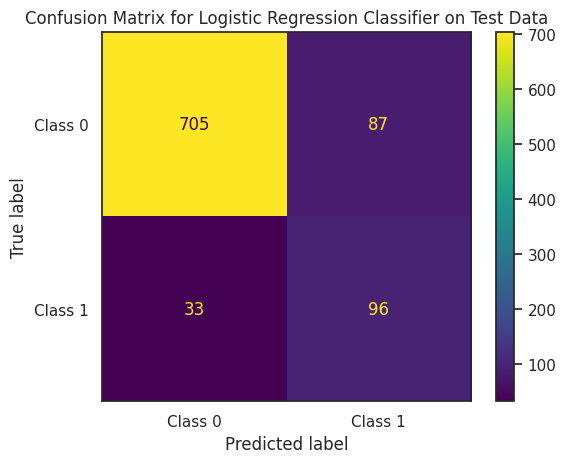

Accuracy of the model: 0.870
F1 Score of the model: 0.615


['LogisticRegression_model_V3_with_threshold.joblib']

In [ ]:
# Changing thresholds for logistic reg
from sklearn.metrics import precision_recall_curve
from joblib import load
model = load("LogisticRegression_model_V3.joblib")

# Predict probabilities on new data
data_prob = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Find the optimal threshold
optimal_idx = np.nanargmax(f1_scores)  # Using nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for F1 Score: {optimal_threshold:.3f}")

# Apply the new threshold to make class predictions
pred_test = (data_prob >= optimal_threshold).astype(int)

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Logistic Regression Classifier on Test Data")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy of the model: {accuracy:.3f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score of the model: {f1:.3f}")

# Create a dictionary to hold the model and the threshold
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Save the dictionary
model_filename = "LogisticRegression_model_V3_with_threshold.joblib"
joblib.dump(model_data, model_filename)

29/29 [==============================] - 0s 3ms/step
Optimal Threshold for F1 Score: 0.156


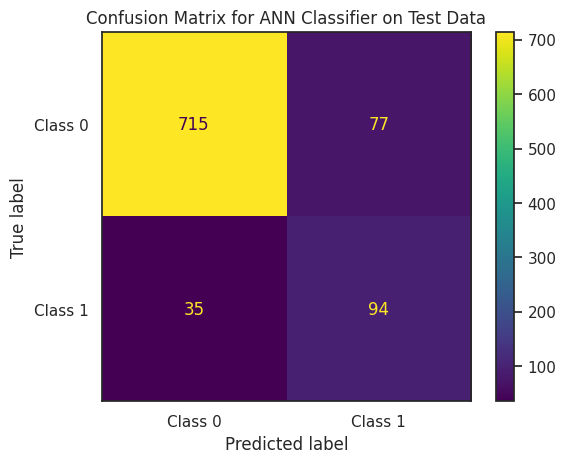

Accuracy of the model: 0.878
F1 Score of the model: 0.627


['ANN_model_V3_with_threshold.joblib']

In [ ]:
# Changing thresholds for ANN
from sklearn.metrics import precision_recall_curve, f1_score
# Load the model
model = load("ANN_model_V3.joblib")

# Predict probabilities on new data
data_prob =[val[0] for val in model.predict(X_test)]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, data_prob)
f1_scores = 2 * recall * precision / (recall + precision + 1e-10)

# Find the optimal threshold
optimal_idx = np.nanargmax(f1_scores)  # Using nanargmax to ignore NaN values
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold for F1 Score: {optimal_threshold:.3f}")

# Apply the new threshold to make class predictions
pred_test = (data_prob >= optimal_threshold).astype(int)

# Display the Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for ANN Classifier on Test Data")
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy of the model: {accuracy:.3f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, pred_test)
print(f"F1 Score of the model: {f1:.3f}")

# Create a dictionary to hold the model and the threshold
model_data = {
    "model": model,
    "threshold": optimal_threshold
}

# Save the dictionary
model_filename = "ANN_model_V3_with_threshold.joblib"
joblib.dump(model_data, model_filename)

### F1 podium prediction example: 2022 Australia Grand Prix (Round 3)

In [ ]:
df_final = main_df.drop(['Unnamed: 0', 'resultId', 'positionOrder', 'milliseconds' ], axis = 1)
print(df_final)

      driverId  constructorId  grid  year  round  circuitId  Top 3 Finish  \
22           8              6     2  2008      2          2             1   
23           9              2     4  2008      2          2             1   
24           5              1     8  2008      2          2             1   
25          15              7     3  2008      2          2             0   
26           1              1     9  2008      2          2             0   
...        ...            ...   ...   ...    ...        ...           ...   
7505       815              9     9  2023     11         11             1   
7507       844              6     6  2023     11         11             0   
7508       832              6    11  2023     11         11             0   
7509       848              3    16  2023     11         11             0   
7512       832              6     4  2023     12         13             0   

      Driver Top 3 Finish Percentage (LAST YR)  \
22                       

In [ ]:
from joblib import load

round = 3

# Load Logistic Regression model
model_data = load("LogisticRegression_model_V3_with_threshold.joblib")
model = model_data["model"]
optimal_threshold = model_data["threshold"]

df_test = lg_df_3[(lg_df_3['year'] == 2022) & (lg_df_3['round'] == round)] # 2022

X_2022 = df_test[df_test.columns.tolist()[:-1]].values

probabilities = model.predict_proba(X_2022) # nvm problem solved

pred_test = (probabilities[:, 1] >= optimal_threshold).astype(int)

df_prediction = df_final[["year","round","driverId","constructorId","grid","Top 3 Finish"]]
df_prediction = df_prediction[(df_prediction["year"] == 2022) & (df_prediction["round"] == round)]

# Create a dictionary to map driverId to name
driver_dict = pd.Series(drivers_df.name.values, index = drivers_df.driverId).to_dict()

df_prediction['driverId'] = df_prediction['driverId'].map(driver_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

constructors_dict = pd.Series(constructors_df.name.values, index = constructors_df.constructorId).to_dict()

df_prediction['constructorId'] = df_prediction['constructorId'].map(constructors_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

print(df_prediction)





      year  round          driverId constructorId  grid  Top 3 Finish  \
7366  2022      3   Charles Leclerc       Ferrari     1             1   
7367  2022      3      Sergio Pérez      Red Bull     3             1   
7368  2022      3      Lando Norris       McLaren     4             0   
7369  2022      3  Daniel Ricciardo       McLaren     7             0   
7371  2022      3   Nicholas Latifi      Williams    18             0   
7372  2022      3    Max Verstappen      Red Bull     2             0   
7373  2022      3      Carlos Sainz       Ferrari     9             0   

      Top_3_Finish_Prediction  
7366                        1  
7367                        0  
7368                        0  
7369                        0  
7371                        0  
7372                        1  
7373                        0  


In [ ]:
# Load Random Forest
from joblib import load

round = 3

model_data = load("RandomForestClassifier_model_V3_with_threshold.joblib")
model = model_data["model"]
optimal_threshold = model_data["threshold"]

df_test = lg_df_3[(lg_df_3['year'] == 2022) & (lg_df_3['round'] == round)] # 2022

X_2022 = df_test[df_test.columns.tolist()[:-1]].values

probabilities = model.predict_proba(X_2022) # nvm problem solved

pred_test = (probabilities[:, 1] >= optimal_threshold).astype(int)

df_prediction = df_final[["year","round","driverId","constructorId","grid","Top 3 Finish"]]
df_prediction = df_prediction[(df_prediction["year"] == 2022) & (df_prediction["round"] == round)]

# Create a dictionary to map driverId to name
driver_dict = pd.Series(drivers_df.name.values, index = drivers_df.driverId).to_dict()

df_prediction['driverId'] = df_prediction['driverId'].map(driver_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

constructors_dict = pd.Series(constructors_df.name.values, index = constructors_df.constructorId).to_dict()

df_prediction['constructorId'] = df_prediction['constructorId'].map(constructors_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

print(df_prediction)





      year  round          driverId constructorId  grid  Top 3 Finish  \
7366  2022      3   Charles Leclerc       Ferrari     1             1   
7367  2022      3      Sergio Pérez      Red Bull     3             1   
7368  2022      3      Lando Norris       McLaren     4             0   
7369  2022      3  Daniel Ricciardo       McLaren     7             0   
7371  2022      3   Nicholas Latifi      Williams    18             0   
7372  2022      3    Max Verstappen      Red Bull     2             0   
7373  2022      3      Carlos Sainz       Ferrari     9             0   

      Top_3_Finish_Prediction  
7366                        1  
7367                        1  
7368                        0  
7369                        0  
7371                        0  
7372                        1  
7373                        0  


In [ ]:
# Load ANN Model
from joblib import load

round = 3

model_data = load("ANN_model_V3_with_threshold.joblib")
model = model_data["model"]
optimal_threshold = model_data["threshold"]

df_test = lg_df_3[(lg_df_3['year'] == 2022) & (lg_df_3['round'] == round)] # 2022

X_2022 = df_test[df_test.columns.tolist()[:-1]].values.astype(np.int32)
probabilities = model.predict(X_2022) # nvm problem solved
probabilities = np.asarray([val[0] for val in probabilities])
pred_test = (probabilities >= optimal_threshold).astype(int)

df_prediction = df_final[["year","round","driverId","constructorId","grid","Top 3 Finish"]]
df_prediction = df_prediction[(df_prediction["year"] == 2022) & (df_prediction["round"] == round)]

# Create a dictionary to map driverId to name
driver_dict = pd.Series(drivers_df.name.values, index = drivers_df.driverId).to_dict()

df_prediction['driverId'] = df_prediction['driverId'].map(driver_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

constructors_dict = pd.Series(constructors_df.name.values, index = constructors_df.constructorId).to_dict()

df_prediction['constructorId'] = df_prediction['constructorId'].map(constructors_dict)

df_prediction['Top_3_Finish_Prediction'] = pred_test

print(df_prediction)




1/1 [==============================] - 0s 105ms/step
      year  round          driverId constructorId  grid  Top 3 Finish  \
7366  2022      3   Charles Leclerc       Ferrari     1             1   
7367  2022      3      Sergio Pérez      Red Bull     3             1   
7368  2022      3      Lando Norris       McLaren     4             0   
7369  2022      3  Daniel Ricciardo       McLaren     7             0   
7371  2022      3   Nicholas Latifi      Williams    18             0   
7372  2022      3    Max Verstappen      Red Bull     2             0   
7373  2022      3      Carlos Sainz       Ferrari     9             0   

      Top_3_Finish_Prediction  
7366                        1  
7367                        0  
7368                        0  
7369                        0  
7371                        0  
7372                        1  
7373                        0  
